In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1.
Read the dataset to the python environment.

In [2]:
data=pd.read_excel("iris.xls")
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# 2.
Do necessary pre-processing steps.

In [6]:
#To find missing values
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [7]:
#To fill those missing values
for i in['SL', 'SW', 'PL']:
    data[i]=data[i].fillna(data[i].median())

In [8]:
#To check whether missing values are filled
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [9]:
data['Classification'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Classification, dtype: int64

In [ ]:
#TO LABEL ENCODE THE 'CLASSIFICATION'
from sklearn.preprocessing import LabelEncoder
label_m=LabelEncoder()
a=['Classification']
for i in np.arange(len(a)):
    data[a[i]]=label_m.fit_transform(data[a[i]])
data.head()

# 3.
Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [10]:
x=data.drop(['Classification'],axis=1)
y=data['Classification']

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state = 42)

In [12]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)

LogisticRegression()

In [13]:
y_pred=logit_model.predict(x_test)
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [14]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred)
confusion_matrix(y_test,y_pred)

array([[18,  1,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [15]:
#skn

In [16]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    Classifier =KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    Classifier.fit(x_train,y_train)
    y_pred=Classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

Text(0, 0.5, 'accuracy')

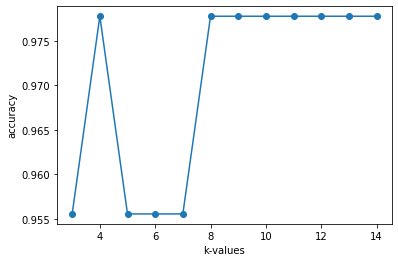

In [17]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k-values')
plt.ylabel('accuracy')

In [18]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    Classifier =KNeighborsClassifier(n_neighbors=10,metric='minkowski')
    Classifier.fit(x_train,y_train)
    y_pred=Classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [19]:
accuracy_score(y_test,y_pred)

0.9777777777777777

In [20]:
confusion_matrix(y_test,y_pred)

array([[18,  1,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [24]:
#decision tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [28]:
y_pred=dt_model.predict(x_test)

In [29]:
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

In [31]:
y_test.value_counts()

Iris-setosa        19
Iris-versicolor    13
Iris-virginica     13
Name: Classification, dtype: int64

In [32]:
confusion_matrix(y_test,y_pred)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [33]:
#svm

In [34]:
from sklearn.svm import SVC
svm_linear=SVC(kernel='rbf')
svm_linear.fit(x_train,y_train)

SVC()

In [35]:
y_pred=svm_linear.predict(x_test)

In [36]:
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [37]:
accuracy_score(y_test,y_pred)

0.9777777777777777

In [38]:
confusion_matrix(y_test,y_pred)

array([[18,  1,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [39]:
#randomforest

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [42]:
y_pred=rf.predict(x_test)

In [43]:
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [44]:
accuracy_score(y_test,y_pred)

1.0

In [45]:
confusion_matrix(y_test,y_pred)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [46]:
# Accuracy of Decision Tree and Random Forest are higher than others. So they are the best medols which give better results to predict iris species.